In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Velocity Kinematics and Statics

## General


Considering the case where teh end-effector configuration is represented by a minimal set of coordinates $x \in \mathbb{R^m}$
 and the velocity is given by $\dot{x} = \frac{dx}{dt} \in \mathbb{R^m}$ .In this case,the forward kinematics can be writen as 
$$
x(t) = f( \theta (t) ),
$$

where $\theta \mathbb{R^n}$ is a set of joint variables.


$$
\dot{x} = \frac{\partial f(\theta)}{\partial \theta} \frac{d\theta(t)}{dt} = \frac{\partial f(\theta)}{\partial \theta} \dot{\theta} = J(\theta) \dot{\theta}
$$

where $J(\theta) \mathbb{R^{m \times n}}$ is the Jacobian


In [ ]:
L1 = 10
L2 = 10

theta1 = np.pi/16
theta2 = np.pi/32

x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)


x1_dot = -L1 * np.sin(theta1) * 0.5 - L2 *  (theta1_dot + theta2_dot) * np.cos(theta1 + theta2)
x2_dot = L1 * theta1_dot * np.cos(theta1) + L2 * (theta1_dot + theta2_dot) * np.cos(theta1 + theta2)


Jac_matrix = np.array([
    [-L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2), -L2 * np.sin(theta1 + theta2)],
    [L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2), L2 * np.cos(theta1 + theta2)],
]) # @ np.array([x1_dot, x2_dot]).T


$$
v_{tip} = J_1(\theta) \dot{\theta_1} + J_2(\theta) \dot{\theta_2}
$$

In [4]:
def makeJac(L1, L2, theta1, theta2):
    return np.array([
        [-L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2), -L2 * np.sin(theta1 + theta2)],
        [L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2), L2 * np.cos(theta1 + theta2)],
    ])  # @ np.array([x1_dot, x2_dot]).T


makeJac(1,1,0, 3* np.pi/4)

array([[-0.70710678, -0.70710678],
       [ 0.29289322, -0.70710678]])

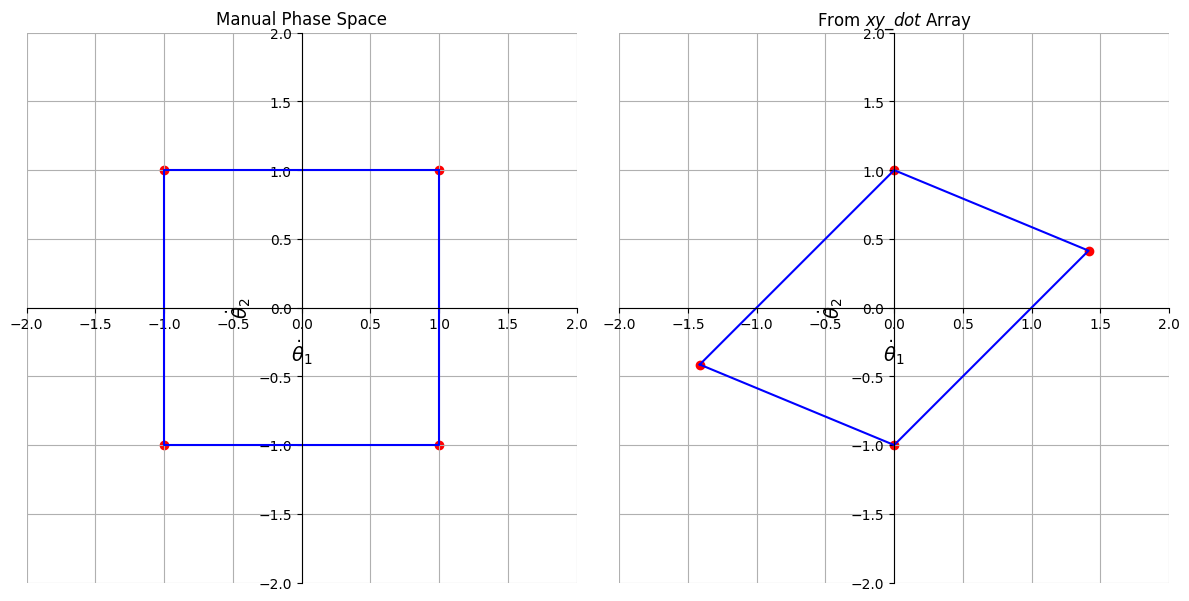

In [ ]:


# Define square corners
theta1 = [1, -1, -1, 1, 1]
theta2 = [1, 1, -1, -1, 1]

theta = np.vstack((theta1, theta2))

xy_dot = makeJac(1,1,0, 3* np.pi/4) @ theta 

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# --- First subplot ---
axes[0].plot(theta1, theta2, 'b-')
axes[0].scatter(theta1[:-1], theta2[:-1], color='red')
axes[0].spines['left'].set_position('zero')
axes[0].spines['bottom'].set_position('zero')
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')
axes[0].set_xlabel(r'$\dot{\theta}_1$', fontsize=14)
axes[0].set_ylabel(r'$\dot{\theta}_2$', fontsize=14)
axes[0].set_aspect('equal')
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)
axes[0].grid(True)
axes[0].set_title("Manual Phase Space")

# --- Second subplot ---
axes[1].plot(xy_dot[0, :], xy_dot[1, :], 'b-')
axes[1].scatter(xy_dot[0, :-1], xy_dot[1, :-1], color='red')
axes[1].spines['left'].set_position('zero')
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].set_xlabel(r'$\dot{\theta}_1$', fontsize=14)
axes[1].set_ylabel(r'$\dot{\theta}_2$', fontsize=14)
axes[1].set_aspect('equal')
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)
axes[1].grid(True)
axes[1].set_title("From $xy\_dot$ Array")

# Tight layout
plt.tight_layout()
plt.show()

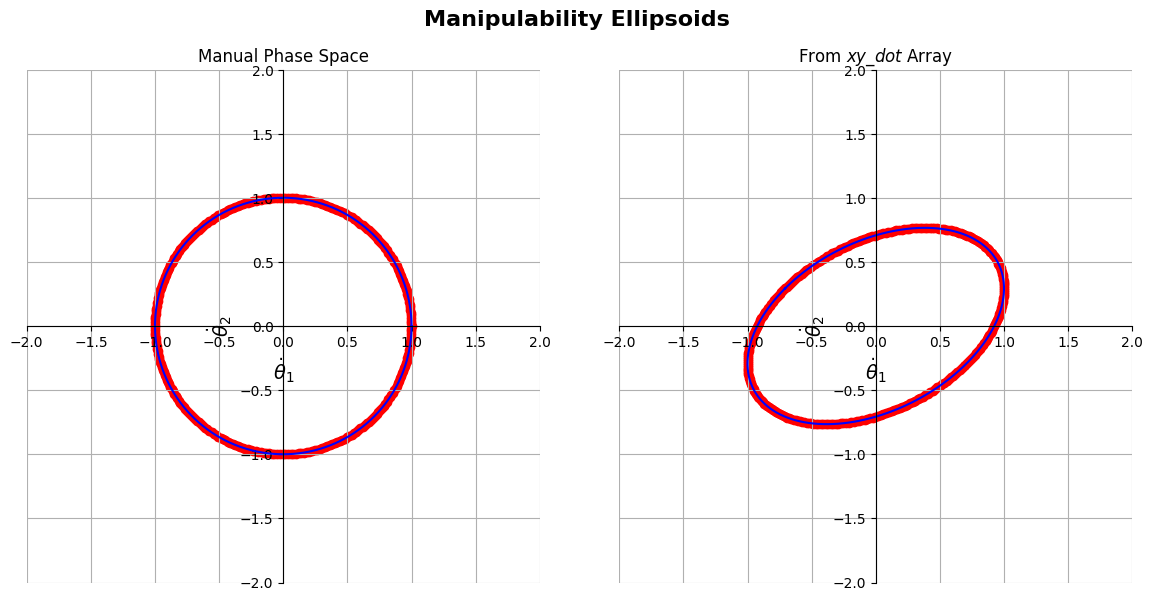

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Generate circle points
theta = np.linspace(0, 2 * np.pi, 300)
theta1 = np.cos(theta)
theta2 = np.sin(theta)


theta = np.vstack((theta1, theta2))
xy_dot = makeJac(1,1,0, 3* np.pi/4) @ theta 

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# --- First subplot ---
axes[0].plot(theta1, theta2, 'b-')
axes[0].scatter(theta1[:-1], theta2[:-1], color='red')
axes[0].spines['left'].set_position('zero')
axes[0].spines['bottom'].set_position('zero')
axes[0].spines['right'].set_color('none')
axes[0].spines['top'].set_color('none')
axes[0].set_xlabel(r'$\dot{\theta}_1$', fontsize=14)
axes[0].set_ylabel(r'$\dot{\theta}_2$', fontsize=14)
axes[0].set_aspect('equal')
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)
axes[0].grid(True)
axes[0].set_title("Manual Phase Space")

# --- Second subplot ---
axes[1].plot(xy_dot[0, :], xy_dot[1, :], 'b-')
axes[1].scatter(xy_dot[0, :-1], xy_dot[1, :-1], color='red')
axes[1].spines['left'].set_position('zero')
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['right'].set_color('none')
axes[1].spines['top'].set_color('none')
axes[1].set_xlabel(r'$\dot{\theta}_1$', fontsize=14)
axes[1].set_ylabel(r'$\dot{\theta}_2$', fontsize=14)
axes[1].set_aspect('equal')
axes[1].set_xlim(-2, 2)
axes[1].set_ylim(-2, 2)
axes[1].grid(True)
axes[1].set_title("From $xy\_dot$ Array")

# Tight layout
fig.suptitle("Manipulability Ellipsoids", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Give space for title
plt.show()


### Conservation of Power Argument

Assuming negligible power is used to move the robot, the power at the tip must equal the power at the joints.

Let:

$
\mathbf{f}_{\text{tip}}: \text{ force vector at the robot's tip}
$

$
\boldsymbol{\tau}: \text{ torque vector at the joints}
$

$
\mathbf{v}_{\text{tip}}: \text{ velocity at the tip}
$

$
\dot{\boldsymbol{\theta}}: \text{ joint velocity vector}
$

$
J(\boldsymbol{\theta}): \text{ Jacobian matrix}
$


Then, the conservation of power gives:

$$
\mathbf{f}_{\text{tip}}^T \mathbf{v}_{\text{tip}} = \boldsymbol{\tau}^T \dot{\boldsymbol{\theta}}
$$

Since $ \mathbf{v}_{\text{tip}} = J(\boldsymbol{\theta}) \dot{\boldsymbol{\theta}} $, we substitute to get:

$$
\mathbf{f}_{\text{tip}}^T J(\boldsymbol{\theta}) \dot{\boldsymbol{\theta}} = \boldsymbol{\tau}^T \dot{\boldsymbol{\theta}}
$$

This must hold for all $ \dot{\boldsymbol{\theta}} \$, so we conclude:

$$
\boldsymbol{\tau} = J^T(\boldsymbol{\theta}) \mathbf{f}_{\text{tip}}
$$


## Manipulator Jacobian

### Space Jacobian

Using three properties

(i) If $A, B \in \mathbb{R}^{n \times n}$ are both invertible, then:

$$
(AB)^{-1} = B^{-1} A^{-1}
$$

(ii) If $A \in \mathbb{R}^{n \times n}$ is constant and $\theta(t)$ is a scalar function of $t$, then:

$$
\frac{d}{dt}\left(e^{A\theta(t)}\right) = A e^{A\theta(t)} \dot{\theta}(t) = e^{A\theta(t)} A \dot{\theta}(t)
$$

(iii) The inverse of the matrix exponential satisfies:

$$
\left(e^{A\theta}\right)^{-1} = e^{-A\theta}
$$




Considering an n-link open chain whose forward kinematics is expressed in the following product of the exponentials form:

$$
T(\theta_1, \ldots, \theta_n) = e^{[S_1] \theta_1} \, e^{[S_2] \theta_2} \cdots e^{[S_n] \theta_n} M
$$

The spatial twist $V_s$ is given by $ [\mathbf{V}_s] = \dot{T} {T}^{-1}$

$$
\dot{T} =
[S_1] \dot{\theta}_1 e^{[S_1] \theta_1} \cdots e^{[S_n] \theta_n} M
+ e^{[S_1] \theta_1} [S_2] \dot{\theta}_2 e^{[S_2] \theta_2} \cdots e^{[S_n] \theta_n} M
+ \cdots
$$

$$
T^{-1} = M^{-1} e^{-[S_n]\theta_n} \cdots e^{-[S_1]\theta_1}
$$

By mutliplying above terms:

The spatial velocity \( \mathbf{V}_s \) is given by:

$$
\mathbf{V}_s = 
\underbrace{\mathbf{S}_1}_{\text{Js}_1} \dot{\theta}_1 + 
\underbrace{\text{Ad}_{e^{[S_1] \theta_1}} (\mathbf{S}_2)}_{\text{Js}_2} \dot{\theta}_2 + 
\underbrace{\text{Ad}_{e^{[S_1] \theta_1} e^{[S_2] \theta_2}} (\mathbf{S}_3)}_{\text{Js}_3} \dot{\theta}_3 + \cdots
$$


### example


![Space Jacobian for a spatial RRRP chain.](./assets/Fig5_7.png)

In [30]:
# example 
L1 = 10
L2 = 3
theta1 = np.pi/2
theta2 = np.pi/4


w_s1 = np.array([0, 0, 1]).T
q_s1 = np.array([0, 0, 0]).T

w_s2 = np.array([0, 0, 1]).T
q_s2 = np.array([L1 * np.cos(theta1), L1*np.sin(theta1), 0]).T

w_s3 = np.array([0, 0, 1]).T
q_s3 = np.array([L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2), L1*np.sin(theta1) + L2*np.sin(theta1 + theta2), 0]).T

w_s4 = np.array([0, 0, 0]).T

v_s1 = -1 * np.cross(w_s1, q_s1)
v_s2 = -1 * np.cross(w_s2, q_s2)
v_s3 = -1 * np.cross(w_s3, q_s3)
v_s4 = np.array([0, 0 ,1]).T

In [32]:
def make_J(w, v):
    return np.vstack((w.reshape(3,1), v.reshape(3,1)))  # shape (6,1)

J_s1 = make_J(w_s1, v_s1)
J_s2 = make_J(w_s2, v_s2)
J_s3 = make_J(w_s3, v_s3)
J_s4 = make_J(w_s4, v_s4)


J_from = np.hstack((J_s1, J_s2, J_s3, J_s4))

print(J_from)  # should be (6, 4)

J_val = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [1, 1, 1, 0],
    [0, L1*np.sin(theta1), L1*np.sin(theta1) + L2*np.sin(theta1 + theta2), 0],
    [0, -L1*np.cos(theta1), -L1*np.cos(theta1) - L2*np.cos(theta1 + theta2), 0],
    [0, 0, 0, 1]
])



print(J_val)
# Validation
print(np.allclose(J_val, J_from))


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+01  1.21213203e+01  0.00000000e+00]
 [ 0.00000000e+00 -6.12323400e-16  2.12132034e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  1.00000000e+00]]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+01  1.21213203e+01  0.00000000e+00]
 [ 0.00000000e+00 -6.12323400e-16  2.12132034e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
True


### example 2

![Space Jacobian for the spatial RRPRRR chain](./assets/Fig5_8.png)

In [40]:
def rotation_matrix(axis, theta):
    """
    Return the rotation matrix associated with counterclockwise rotation
    about the given axis ('x', 'y', or 'z') by theta radians.
    """
    c, s = np.cos(theta), np.sin(theta)

    if axis == 'x':
        return np.array([
            [1, 0,  0],
            [0, c, -s],
            [0, s,  c]
        ])
    
    elif axis == 'y':
        return np.array([
            [ c, 0, s],
            [ 0, 1, 0],
            [-s, 0, c]
        ])
    
    elif axis == 'z':
        return np.array([
            [c, -s, 0],
            [s,  c, 0],
            [0,  0, 1]
        ])
    
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'")

L1 = 3
L2 = 5
theta1 = np.pi/2
theta2 = np.pi/4
theta3 = 2
theta4 = np.pi/32
theta5 = np.pi/16

w_s1 = np.array([0, 0, 1]).T
q_s1 = np.array([0, 0, L1]).T


w_s2 = np.array([-np.cos(theta1), np.sin(theta1), 0]).T
q_s2 = np.array([0, 0, L1]).T

w_s3 = np.array([0, 0, 0]).T

# the next few joints are depends on the prior joints
w_s4 = rotation_matrix('z' , theta1) @ rotation_matrix('x', -theta2) @ np.array([0, 0, 1]).T
q_s4 = np.array([0,0, L1]).T + rotation_matrix('z' , theta1) @ rotation_matrix('x', -theta2) @ np.array([0, L2 + theta3, 0]).T

w_s5 = rotation_matrix('z' , theta1) @ rotation_matrix('x', -theta2) @ rotation_matrix('z',theta4) @ np.array([-1, 0, 0]).T
q_s5 = q_s4

w_s6 = rotation_matrix('z' , theta1) @ rotation_matrix('x', -theta2) @ rotation_matrix('z',theta4) @ rotation_matrix('x', -theta5) @ np.array([0, 1, 0]).T
q_s6 = q_s4


v_s1 = -1 * np.cross(w_s1, q_s1)
v_s2 = -1 * np.cross(w_s2, q_s2)
v_s3 = rotation_matrix('z' , theta1) @ rotation_matrix('x', -theta2) @ np.array([0, 1, 0]).T
v_s4 = -1 * np.cross(w_s4, q_s4)
v_s5 = -1 * np.cross(w_s5, q_s5)
v_s6 = -1 * np.cross(w_s5, q_s5)


J_s1 = np.vstack((w_s1.reshape(3,1), v_s1.reshape(3,1)))  # shape (6,1)
J_s2 = np.vstack((w_s2.reshape(3,1), v_s2.reshape(3,1)))  # shape (6,1)
J_s3 = np.vstack((w_s3.reshape(3,1), v_s3.reshape(3,1)))  # shape (6,1)
J_s4 = np.vstack((w_s4.reshape(3,1), v_s4.reshape(3,1)))  # shape (6,1)
J_s5 = np.vstack((w_s5.reshape(3,1), v_s5.reshape(3,1)))  # shape (6,1)
J_s6 = np.vstack((w_s6.reshape(3,1), v_s6.reshape(3,1)))  # shape (6,1)


J_from = np.hstack((J_s1, J_s2, J_s3, J_s4, J_s5, J_s6))
print(J_from)

[[ 0.00000000e+00 -6.12323400e-17  0.00000000e+00 -7.07106781e-01
   6.93085846e-02 -5.52230745e-01]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  4.32978028e-17
  -9.95184727e-01 -9.61337685e-02]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  7.07106781e-01
   6.93085846e-02 -8.28130124e-01]
 [ 0.00000000e+00 -3.00000000e+00 -7.07106781e-01  2.98732971e-16
  -1.94035890e+00 -1.94035890e+00]
 [ 0.00000000e+00 -1.83697020e-16  4.32978028e-17  4.87867966e+00
   2.07925754e-01  2.07925754e-01]
 [ 0.00000000e+00  0.00000000e+00 -7.07106781e-01  2.46519033e-32
   4.92591308e+00  4.92591308e+00]]


## Body Jacobian


### Definition 5.4: Body Jacobian

Let the forward kinematics of an *n*-link open chain be expressed in the following **product of exponentials** form:

$$
T = M e^{[B_1]\theta_1} \cdots e^{[B_n]\theta_n}
$$

The **body Jacobian** $J_b(\theta) \in \mathbb{R}^{6 \times n}$ relates the joint rate vector $\dot{\theta} \in \mathbb{R}^n$ to the end-effector twist $V_b = (\omega_b, v_b)$ via:

$$
V_b = J_b(\theta) \dot{\theta}
$$

The *i*th column of $J_b(\theta)$ is:

$$
J_{bi}(\theta) = \text{Ad}_{e^{-[B_n]\theta_n} \cdots e^{-[B_{i+1}]\theta_{i+1}}}(B_i), \quad \text{for } i = n-1, \ldots, 1
$$

with:

$$
J_{bn} = B_n
$$


### Relationship Between Space and Body Jacobians

The body Jacobian \( J_b(\theta) \) is related to the space Jacobian \( J_s(\theta) \) through the adjoint transformation:

$$
J_b(\theta) = \text{Ad}_{T_{b}^{s}}(J_s(\theta)) = [\text{Ad}_{T_{b}^{s}}] J_s(\theta) \tag{5.22}
$$

Conversely, the space Jacobian can be obtained from the body Jacobian via:

$$
J_s(\theta) = \text{Ad}_{T_{s}^{b}}(J_b(\theta)) = [\text{Ad}_{T_{s}^{b}}] J_b(\theta)
$$




### Example

$$
\mathbf{V}_b = \mathbf{J}_b(\theta) \dot{\boldsymbol{\theta}}
$$

Now suppose that the minimal set of coordinates $ \mathbf{q} \in \mathbb{R}^6 $ is given by:

$$
\mathbf{q} = (\mathbf{r}, \mathbf{x})
$$

Where:
- $ \mathbf{x} \in \mathbb{R}^3 $ is the position of the origin of the end-effector frame
- $ \mathbf{r} = \hat{\boldsymbol{\omega}} \theta \in \mathbb{R}^3 $ is the exponential coordinate representation for the rotation

And $ \dot{\mathbf{x}} $ is related to $ \mathbf{v}_b $ by a rotation that gives $ \mathbf{v}_b $ in the fixed coordinates:

$$
\dot{\mathbf{x}} = \mathbf{R}_{sb}(\theta) \mathbf{v}_b = \mathbf{R}_{sb}(\theta) \mathbf{J}_v(\theta) \dot{\boldsymbol{\theta}}
$$

Let:

$$
\mathbf{R}_{sb}(\theta) = e^{[\mathbf{r}]} = e^{[\hat{\boldsymbol{\omega}}] \theta}
$$

The time derivative $ \dot{\mathbf{r}} $ is related to the body angular velocity $ \boldsymbol{\omega}_b $ by:

$$
\boldsymbol{\omega}_b = \mathbf{A}(\mathbf{r}) \dot{\mathbf{r}}
$$

Where the matrix $ \mathbf{A}(\mathbf{r}) $ is:

$$
\mathbf{A}(\mathbf{r}) = \mathbf{I} - \frac{1 - \cos \|\mathbf{r}\|}{\|\mathbf{r}\|^2}[\mathbf{r}] + \frac{\|\mathbf{r}\| - \sin \|\mathbf{r}\|}{\|\mathbf{r}\|^3}[\mathbf{r}]^2
$$

Provided $ \mathbf{A}(\mathbf{r}) $ is invertible, we can compute:

$$
\dot{\mathbf{r}} = \mathbf{A}^{-1}(\mathbf{r}) \boldsymbol{\omega}_b = \mathbf{A}^{-1}(\mathbf{r}) \mathbf{J}_\omega(\theta) \dot{\boldsymbol{\theta}}
$$

Putting these together, the full velocity vector is:

$$
\dot{\mathbf{q}} =
\begin{bmatrix}
\dot{\mathbf{r}} \\
\dot{\mathbf{x}}
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{A}^{-1}(\mathbf{r}) & \mathbf{0} \\
\mathbf{0} & \mathbf{R}_{sb}
\end{bmatrix}
\begin{bmatrix}
\boldsymbol{\omega}_b \\
\mathbf{v}_b
\end{bmatrix}
$$

Hence, the analytic Jacobian $ \mathbf{J}_a $ is related to the body Jacobian $ \mathbf{J}_b $ by:

$$
\mathbf{J}_a(\theta) =
\begin{bmatrix}
\mathbf{A}^{-1}(\mathbf{r}) & \mathbf{0} \\
\mathbf{0} & \mathbf{R}_{sb}(\theta)
\end{bmatrix}
\begin{bmatrix}
\mathbf{J}_\omega(\theta) \\
\mathbf{J}_v(\theta)
\end{bmatrix}
=
\begin{bmatrix}
\mathbf{A}^{-1}(\mathbf{r}) & \mathbf{0} \\
\mathbf{0} & \mathbf{R}_{sb}(\theta)
\end{bmatrix}
\mathbf{J}_b(\theta)
$$


### manipulability



